In [8]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import math
from classy import Class

In [9]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [14]:
axi_settings = {"output":'tCl,lCl',
                'scf_potential' : 'axion',
                'n_axion' : 2,
                'scf_parameters' : '0.1,0', #check if this parameter is passed correctly
                'log10_axion_ac': -3.8, 
                'log10_fraction_axion_ac': -0.7,
                'scf_tuning_index':0,
                "lensing": 'yes',
                'omega_cdm':1.301552e-01,
                'omega_b': 2.252816e-02,
                'h': 7.146560e-01,
                'tau_reio':4.830625e-02,
                'A_s':2.121646e-09,
                'n_s':9.816718e-01,}

M = Class()
M.set(axi_settings)
M.compute()

clM = M.lensed_cl(2500)
ll = clM['ell'][2:]
clTT = clM['tt'][2:]
np.savetxt('clTT_WITH_AXI.txt', clTT)
print(clTT)

[1.37942163e-10 6.52915515e-11 3.71185684e-11 ... 9.84738543e-18
 9.81925079e-18 9.79141958e-18]


 * Compute with log10_axion_ac=-4.400000e+00
 * Compute with log10_fraction_axion_ac=-2.000000e+00
[ 0.0304074   0.02546483  0.02151419 ... -0.03011595 -0.02978826
 -0.02946152]
 * Compute with log10_axion_ac=-2.600000e+00
 * Compute with log10_fraction_axion_ac=-1.300000e+00
[ 0.0304074   0.02546483  0.02151419 ... -0.03011595 -0.02978826
 -0.02946152]


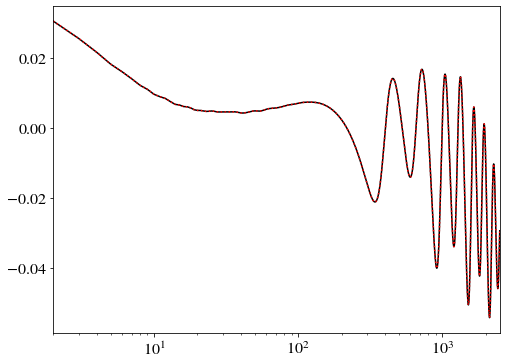

In [4]:
# n = 2

# vary parameters

var_name = 'log10_axion_ac'
var_min = -4.4
var_max = var_min + 0.8
var_num = 2
var_legend = 'log10_axion_ac'
var_figname = 'log10_axion_ac'

# var2_name = 'log10_fraction_axion_ac'
# var2_min = -2
# var2_max = var2_min + 0.7
# var2_num = 2
# var2_legend = 'log10_fraction_axion_ac'
# var2_figname = 'log10_fraction_axion_ac'

# fixed common settings

common_settings = {"output":'tCl,lCl',
                   "lensing": 'yes',
                    'omega_cdm':1.301552e-01,
                    'omega_b': 2.252816e-02,
                    # '100*theta_s':1.0415,
                    'h': 7.146560e-01,
                    'tau_reio':4.830625e-02,
                    'A_s':2.121646e-09,
                    'n_s':9.816718e-01,}

twopi = 2.*math.pi

# compute

lcdm_M = Class()
lcdm_M.set(common_settings)
lcdm_M.compute()

cl_lcdm_M = lcdm_M.lensed_cl(2500)
ll_lcdm_M = cl_lcdm_M['ell'][2:]
clTT_lcdm_M = cl_lcdm_M['tt'][2:]
lcdm_y = clTT_lcdm_M*ll_lcdm_M*(ll_lcdm_M+1)/twopi

np.savetxt('clTT_lcdm_M.txt', clTT_lcdm_M)

# fixed axion settings

axi_settings = {"output":'tCl,lCl',
                'scf_potential' : 'axion',
                'n_axion' : 2,
                #'scf_parameters' : '0.1,0', #check if this parameter is passed correctly
                'log10_fraction_axion_ac': ,
                #'scf_tuning_index':0,
                "lensing": 'yes',
                'omega_cdm':1.301552e-01,
                'omega_b': 2.252816e-02,
                # '100*theta_s':1.0415,
                'h': 7.146560e-01,
                'tau_reio':4.830625e-02,
                'A_s':2.121646e-09,
                'n_s':9.816718e-01,}

# for loop to compute varying parameters and graph

for i in range(var_num):
    
    var = var_min + (var_max-var_min)*i/(var_num-1.)
    #var2 = var2_min + (var2_max-var2_min)*i/(var2_num-1.)
    
    print (' * Compute with %s=%e'%(var_name,var))
    #print (' * Compute with %s=%e'%(var2_name,var2))
    
    if i == 0:
        var_color = 'k'
        linestyle_a = '-'
        var_alpha = 1.
    else:
        var_color = 'r'
        var_alpha = 1.*i/(var_num-1.)
        linestyle_a = ':'

    M = Class()
    M.set(axi_settings)
    M.set({var_name: var})
   # M.set({var2_name: var2})
    M.compute()
    
    clM = M.lensed_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    axi_y = clTT*ll*(ll+1)/twopi
    
    c = i
    
    np.savetxt('clTT_%s.txt' % c, clTT)
    
    print((clTT - clTT_lcdm_M)/clTT)
    
    plt.plot(ll, (clTT - clTT_lcdm_M)/clTT, color = var_color, linestyle = linestyle_a, alpha = var_alpha)

    M.struct_cleanup()

    
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
save_to = '/Users/brendazhou/Cosmo/Repositories/darkmatter-hubble-summer2020/plots/'
#plt.savefig(save_to + 'check.pdf')

# get Cls
#
# clM = M.lensed_cl(2500)
# ll = clM['ell'][2:]
# clTT = clM['tt'][2:]
# axi_y = clTT*ll*(ll+1)/twopi


# plot C_l^TT
#
#   ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha, linestyle = linestyle_a)

# plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
# #plt.xticks([500, 1000, 1500, 2000, 2500])
# #plt.plot(ll_lcdm_M, clTT_lcdm_M, 'r')
# plt.plot(ll, (clTT - clTT_lcdm_M)/clTT, 'k')

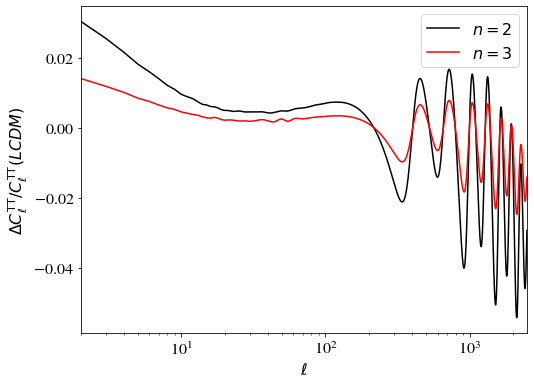

In [39]:
# Vary n
#
common_settings = {"output":'tCl,lCl',
                   "lensing": 'yes',
                    'omega_cdm':1.301552e-01,
                    'omega_b': 2.252816e-02,
                    # '100*theta_s':1.0415,
                    'h': 7.146560e-01,
                    'tau_reio':4.830625e-02,
                    'A_s':2.121646e-09,
                    'n_s':9.816718e-01,}

twopi = 2.*math.pi
legarray = []

lcdm_M = Class()
lcdm_M.set(common_settings)
lcdm_M.compute()

cl_lcdm_M = lcdm_M.lensed_cl(2500)
ll_lcdm_M = cl_lcdm_M['ell'][2:]
clTT_lcdm_M = cl_lcdm_M['tt'][2:]
lcdm_y = clTT_lcdm_M*ll_lcdm_M*(ll_lcdm_M+1)/twopi

axi_settings = {"output":'tCl,lCl',
                'scf_potential' : 'axion',
                'scf_parameters' : '0.1,0',
                'scf_tuning_index':0,
                "lensing": 'yes',
                'log10_fraction_axion_ac':-1.0425,
                'log10_axion_ac':-3.462550e+00,
                'omega_cdm':1.301552e-01,
                'omega_b': 2.252816e-02,
                # '100*theta_s':1.0415,
                'h': 7.146560e-01,
                'tau_reio':4.830625e-02,
                'A_s':2.121646e-09,
                'n_s':9.816718e-01,}

for i in range(2):
    
    if i == 0:
        var_name = 'n_axion'
        var = 2
        var_color = 'k'
        linestyle_a = '-'
        legarray.append(r'$n=2$')
        
    elif i == 1:
        var_name = 'n_axion'
        var = 3
        var_color = 'r'
        linestyle_a = '-'
        legarray.append(r'$n=3$')
        
    
    M = Class()
    M.set(axi_settings)
    M.set({var_name: var})
    M.compute()
    
    clM = M.lensed_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    axi_y = clTT*ll*(ll+1)/twopi
    
    plt.plot(ll, (clTT - clTT_lcdm_M)/clTT, color = var_color, linestyle = linestyle_a)

    M.struct_cleanup()

    
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500);plt.xlabel('$\ell$');plt.ylabel('$\Delta  C_\ell^\mathrm{TT}/C_\ell^\mathrm{TT} (LCDM)$')
plt.legend(legarray)
save_to = '/Users/brendazhou/Cosmo/Repositories/darkmatter-hubble-summer2020/plots/'
plt.savefig(save_to + 'vary_n.pdf')